In [16]:
import logomaker
import pickle
import math
import matplotlib.pyplot as plt
clusters = pickle.load(open("./clusters.pkl", "rb"))
with open("/home/daqop/mountpoint_snellius/binding_data/BA_pMHCI.csv", "r") as csv_f:
    rows = [row.replace("\n", "").split(",") for row in csv_f];
    print(len(rows))

7726


7726


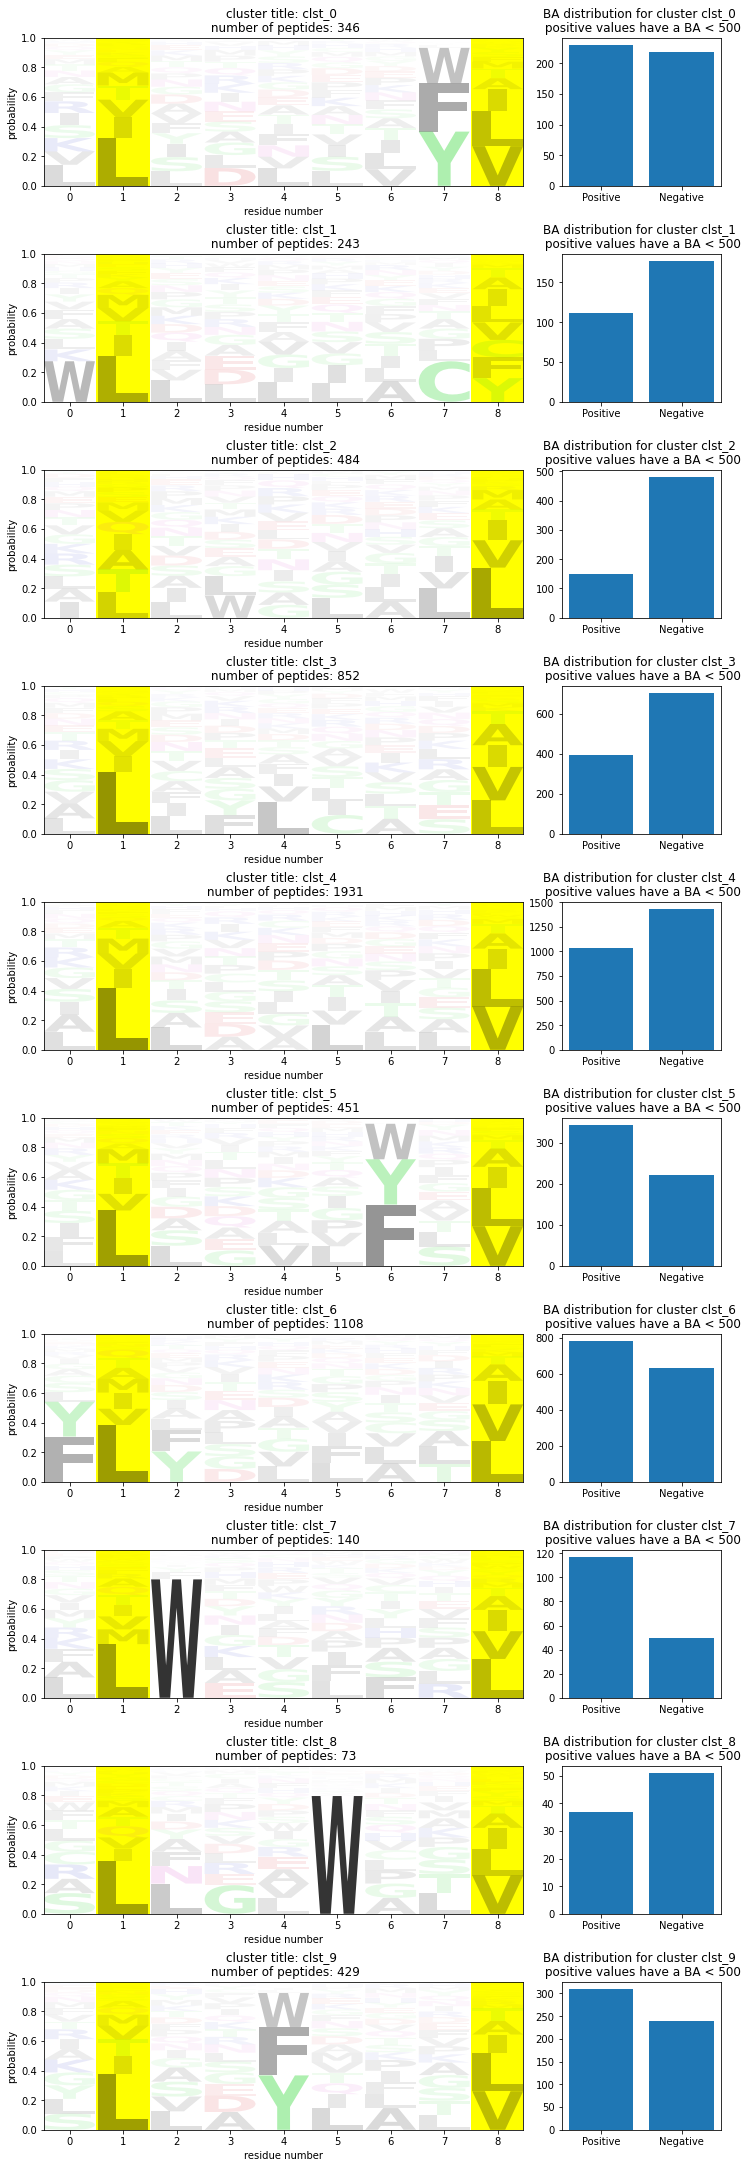

In [89]:
print(len(rows))
fig = plt.figure(figsize=(10,30), constrained_layout= True)
i = 0
for cluster in clusters:
    # if i < 15:
        ax = plt.subplot2grid((10,4), (i,0), colspan=3)
        peptides = clusters[cluster]
        peptides_matrix = logomaker.alignment_to_matrix(sequences = peptides, to_type="probability")
        lm = logomaker.Logo(
            peptides_matrix,
            fade_probabilities = True,
            stack_order= "small_on_top",
            ax=ax
        )
        lm.highlight_position(1)
        lm.highlight_position(8)
        ax.set_title(f"cluster title: {cluster} \n number of peptides: {len(peptides)}")
        ax.set_ylabel("probability")
        ax.set_xlabel("residue number")

        positive_entries = [float(row[3]) for row in rows if row[2] in peptides and float(row[3]) < 500]
        negative_entries = [float(row[3]) for row in rows if row[2] in peptides and float(row[3]) > 500]
        ax = plt.subplot2grid((10,4), (i,3))
        plt.bar(["Positive", "Negative"], [len(positive_entries), len(negative_entries)])
        ax.set_title(f"BA distribution for cluster {cluster} \n positive values have a BA < 500")
        i+=1
plt.show()